<a href="https://colab.research.google.com/github/kaviya0716/CUSTOMER_CHURN_PREDICTION-USING-ML/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**1.Importing the required libraries**


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


In [5]:
df=pd.read_csv('/content/churn-prediction.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.shape

(7043, 21)

In [9]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


Churn
No     5174
Yes    1869
Name: count, dtype: int64


<Axes: xlabel='Churn', ylabel='count'>

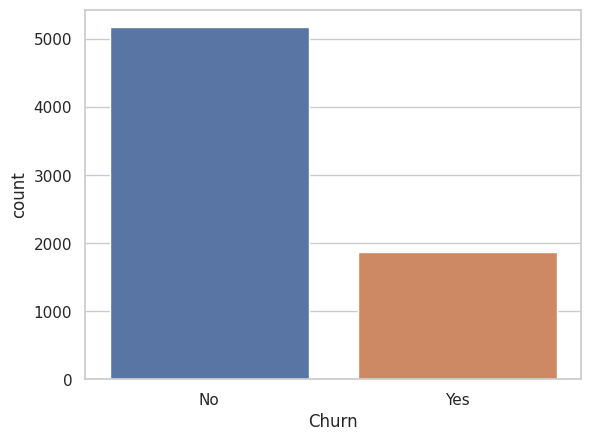

In [11]:
#Total No.of Churned Customers
sns.set_theme(style="whitegrid")
print(df['Churn'].value_counts())
sns.countplot(data=df,x='Churn',hue="Churn")


In [12]:
df['Partner'].value_counts()

,count
Partner,
No,3641
Yes,3402


Text(0.5, 1.0, 'Distribution of Male Vs Female Customers')

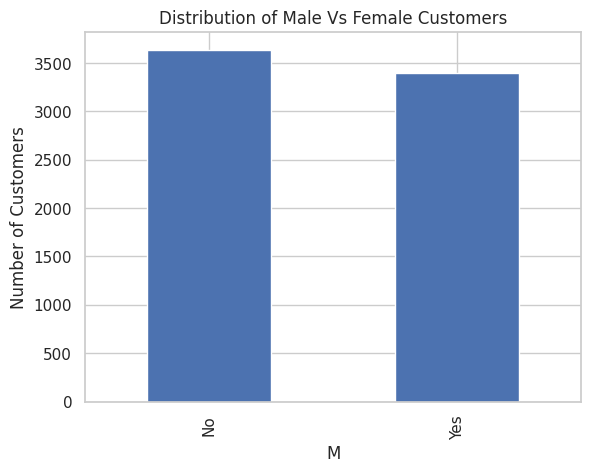

In [13]:
df['Partner'].value_counts().plot(kind="bar")
plt.xlabel('M')
plt.ylabel('Number of Customers')
plt.title('Distribution of Male Vs Female Customers')


/tmp/ipython-input-14-594777712.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=partner_counts.index, y=partner_counts.values, palette='pastel')


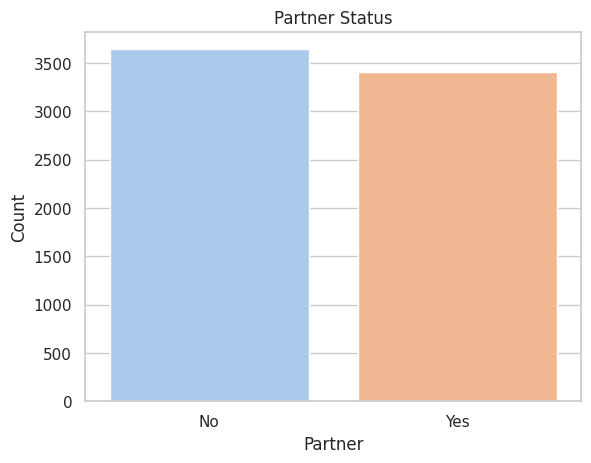

In [14]:
partner_counts = df['Partner'].value_counts()
sns.barplot(x=partner_counts.index, y=partner_counts.values, palette='pastel')
plt.title('Partner Status')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.show()


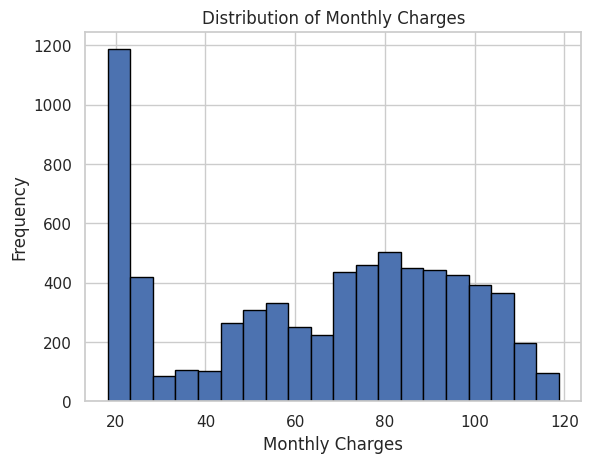

In [15]:
monthly_charges=df['MonthlyCharges']
plt.hist(monthly_charges,bins=20,edgecolor='black')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Charges')
plt.show()

In [16]:
df.TotalCharges=pd.to_numeric(df.TotalCharges,errors='coerce')
df.TotalCharges.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.2 KB


In [17]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [18]:
df.dropna(how='any',inplace=True)

In [19]:
#removing the non required columns
df.drop(columns=['customerID','tenure'],axis=1,inplace=True)

**2. Exploratory Data Analysis**

Univariate Analysis

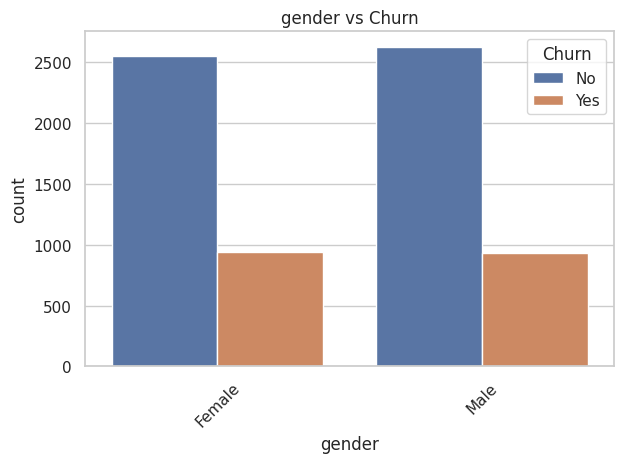

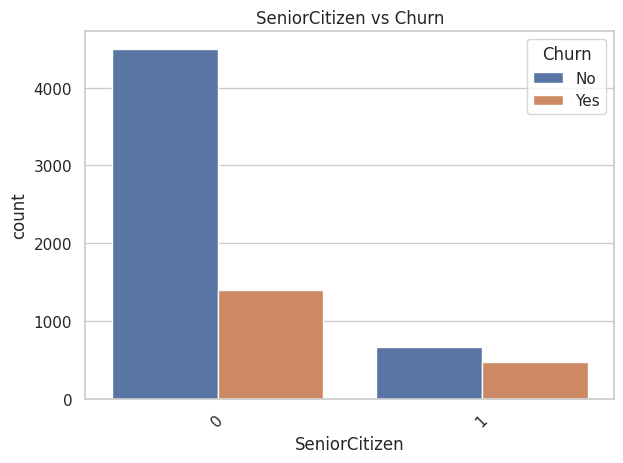

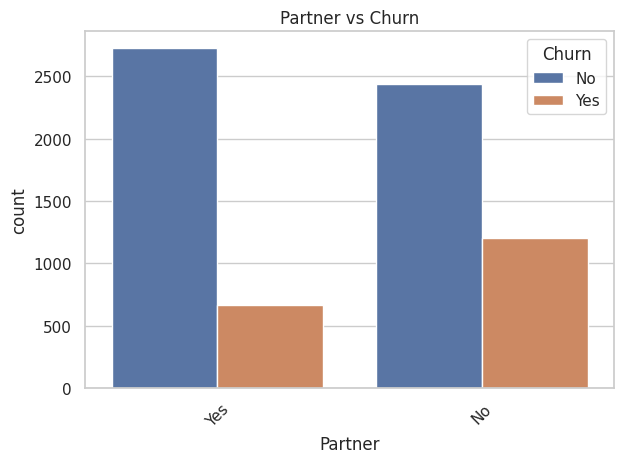

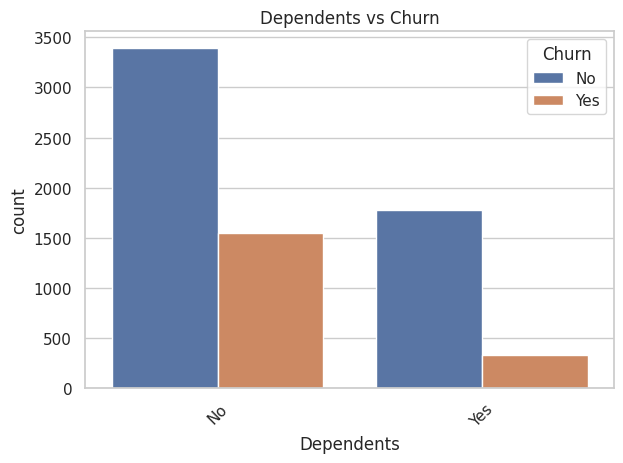

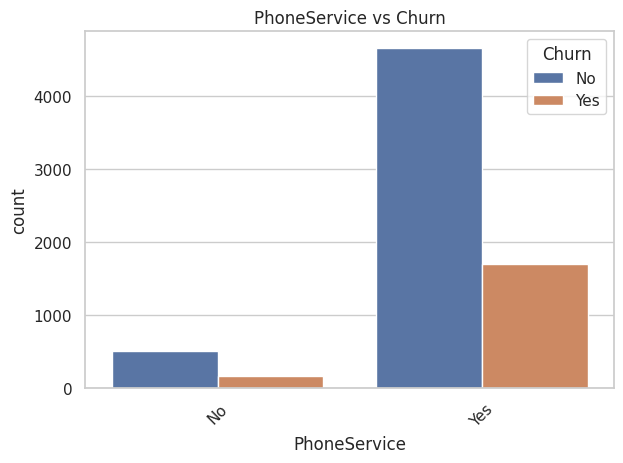

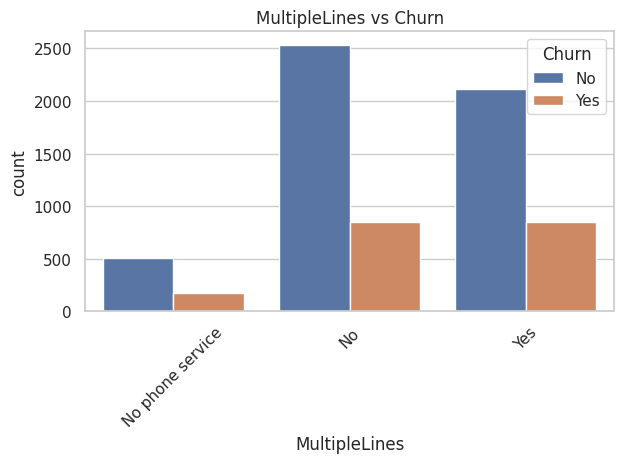

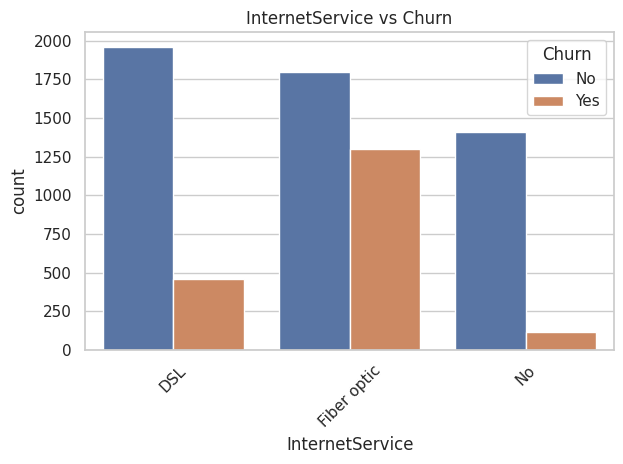

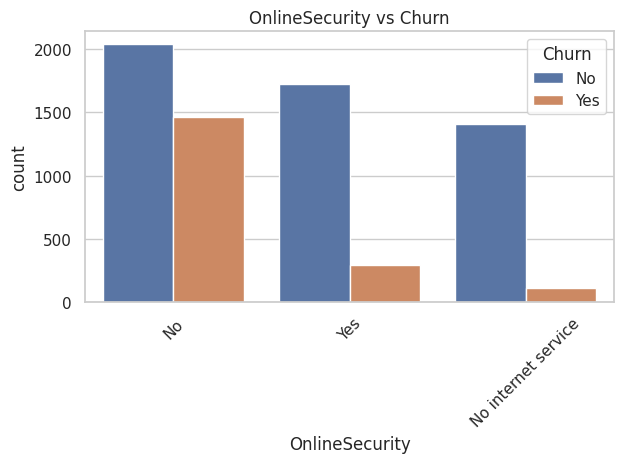

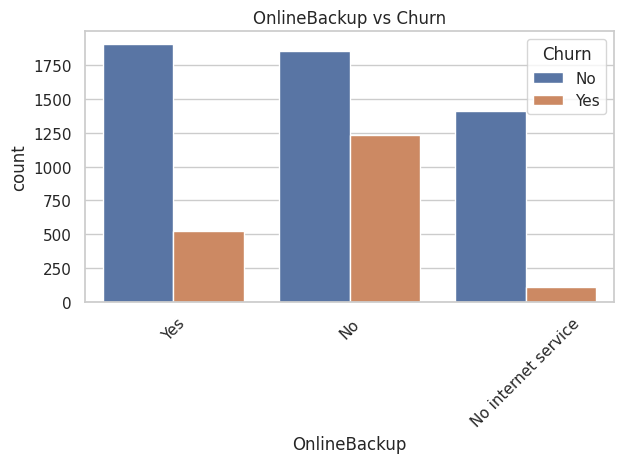

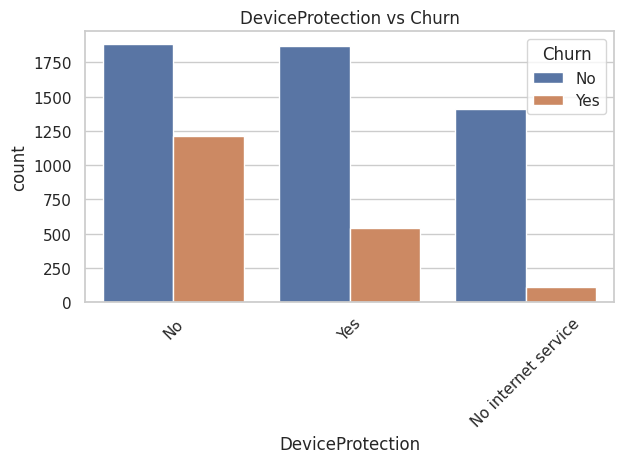

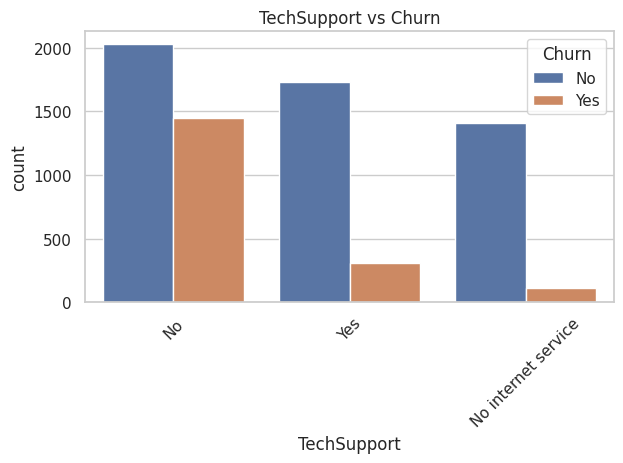

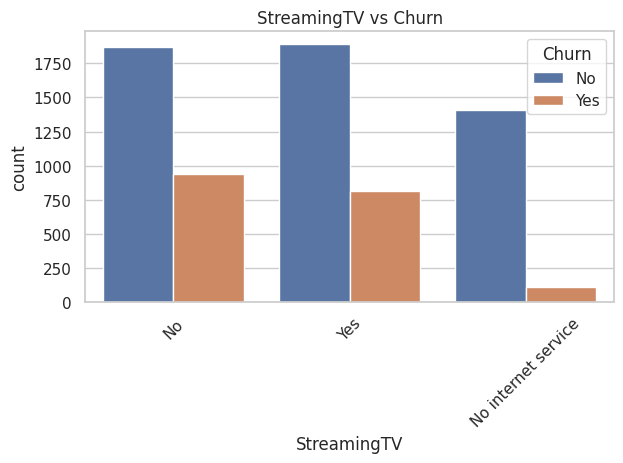

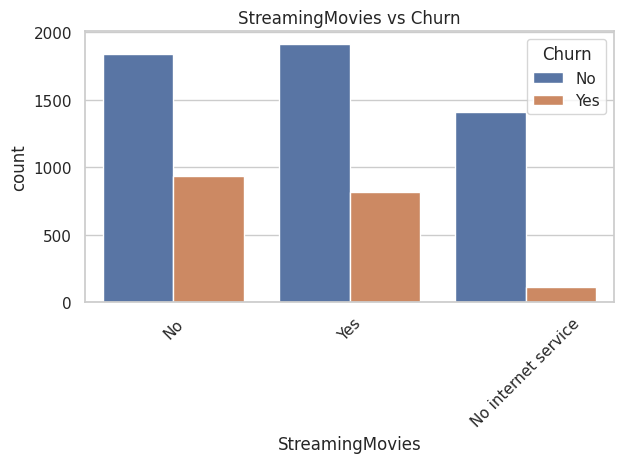

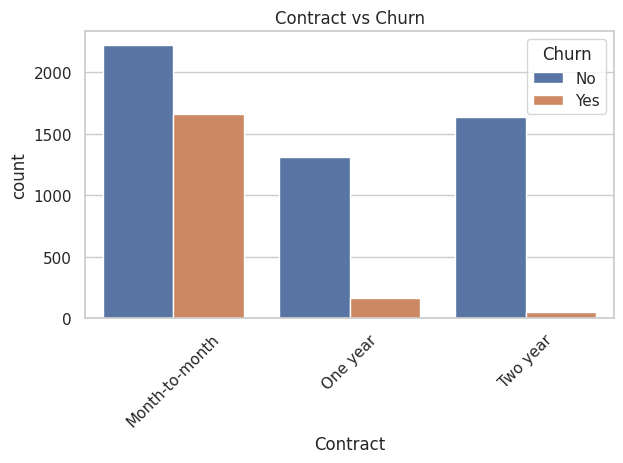

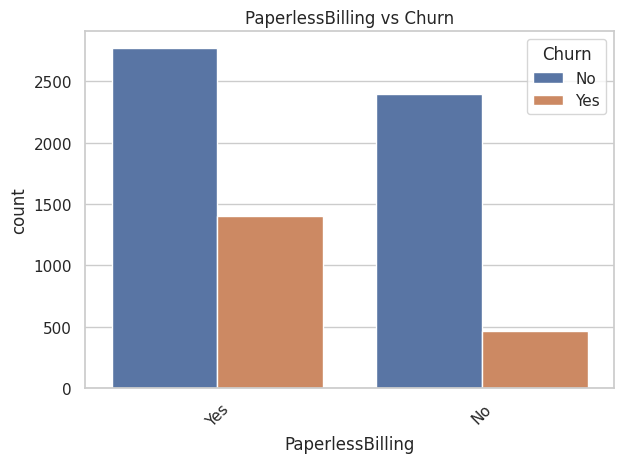

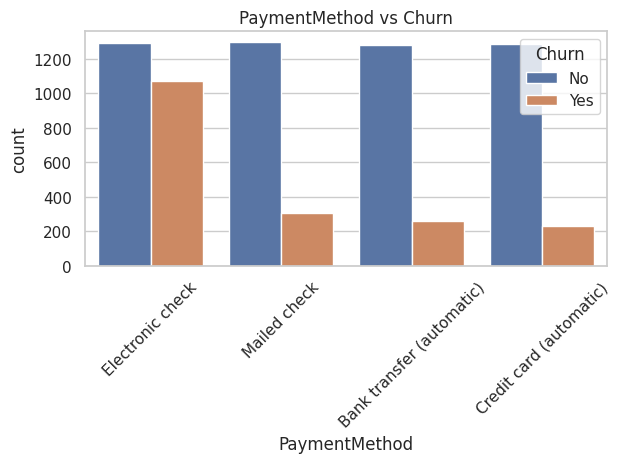

In [20]:
features = df.drop(columns=['Churn','TotalCharges','MonthlyCharges']).columns
for i, col in enumerate(features):
    plt.figure(i)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()

In [21]:
#The target variable is 'Churn ' we need to convert it to 1 for yes ,0 for no
df['Churn']=np.where(df.Churn =='Yes',1,0)
df['Churn'].head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [22]:
df_dummies=pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,29.85,29.85,0,True,False,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False
1,0,56.95,1889.50,0,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,False,True
2,0,53.85,108.15,1,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
3,0,42.30,1840.75,0,False,True,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,0,70.70,151.65,1,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False


In [23]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn                                    7032 non-null   int64  
 4   gender_Female                            7032 non-null   bool   
 5   gender_Male                              7032 non-null   bool   
 6   Partner_No                               7032 non-null   bool   
 7   Partner_Yes                              7032 non-null   bool   
 8   Dependents_No                            7032 non-null   bool   
 9   Dependents_Yes                           7032 non-null   bool   
 10  PhoneService_No                          7032 non-nul

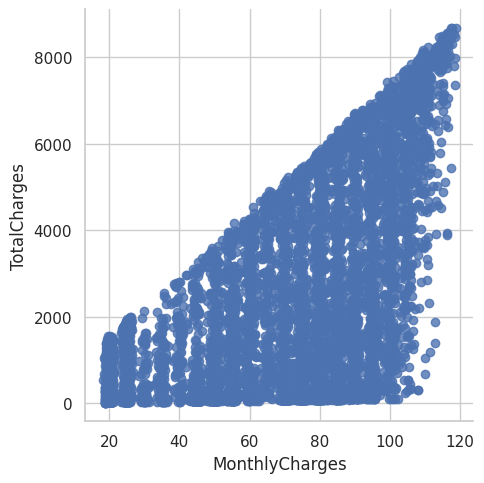

In [24]:
#relationship between monthly charges and total charges
sns.lmplot(data=df_dummies,x='MonthlyCharges',y='TotalCharges',fit_reg=False)

/tmp/ipython-input-25-2768862324.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  monthly=sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies['Churn'] ==0)],color="red",shade=True)
/tmp/ipython-input-25-2768862324.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  monthly=sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies['Churn'] ==1)],color="blue",shade=True)


Text(0.5, 1.0, 'Monthly Charges By Churn Attitude')

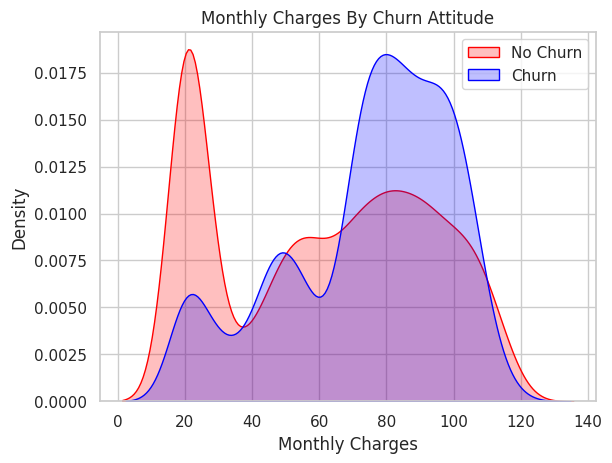

In [25]:
#churn attitudes by monthly charges
monthly=sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies['Churn'] ==0)],color="red",shade=True)
monthly=sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies['Churn'] ==1)],color="blue",shade=True)
monthly.legend(['No Churn','Churn'],loc='upper right')
monthly.set_ylabel('Density')
monthly.set_xlabel('Monthly Charges')
monthly.set_title('Monthly Charges By Churn Attitude')

/tmp/ipython-input-26-3350335258.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  monthly=sns.kdeplot(df_dummies.TotalCharges[(df_dummies['Churn'] ==0)],color="red",shade=True)
/tmp/ipython-input-26-3350335258.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  monthly=sns.kdeplot(df_dummies.TotalCharges[(df_dummies['Churn'] ==1)],color="blue",shade=True)


Text(0.5, 1.0, 'Total Charges By Churn Attitude')

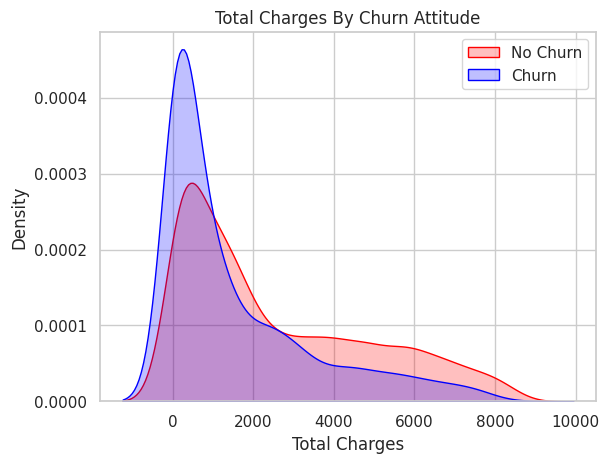

In [26]:
#churn attitudes by total charges
monthly=sns.kdeplot(df_dummies.TotalCharges[(df_dummies['Churn'] ==0)],color="red",shade=True)
monthly=sns.kdeplot(df_dummies.TotalCharges[(df_dummies['Churn'] ==1)],color="blue",shade=True)
monthly.legend(['No Churn','Churn'],loc='upper right')
monthly.set_ylabel('Density')
monthly.set_xlabel('Total Charges')
monthly.set_title('Total Charges By Churn Attitude')

We get higher churn attitude at lower total charges
Higher monthly charges + lower tenure = lower total charges => high churn attitude


<Axes: >

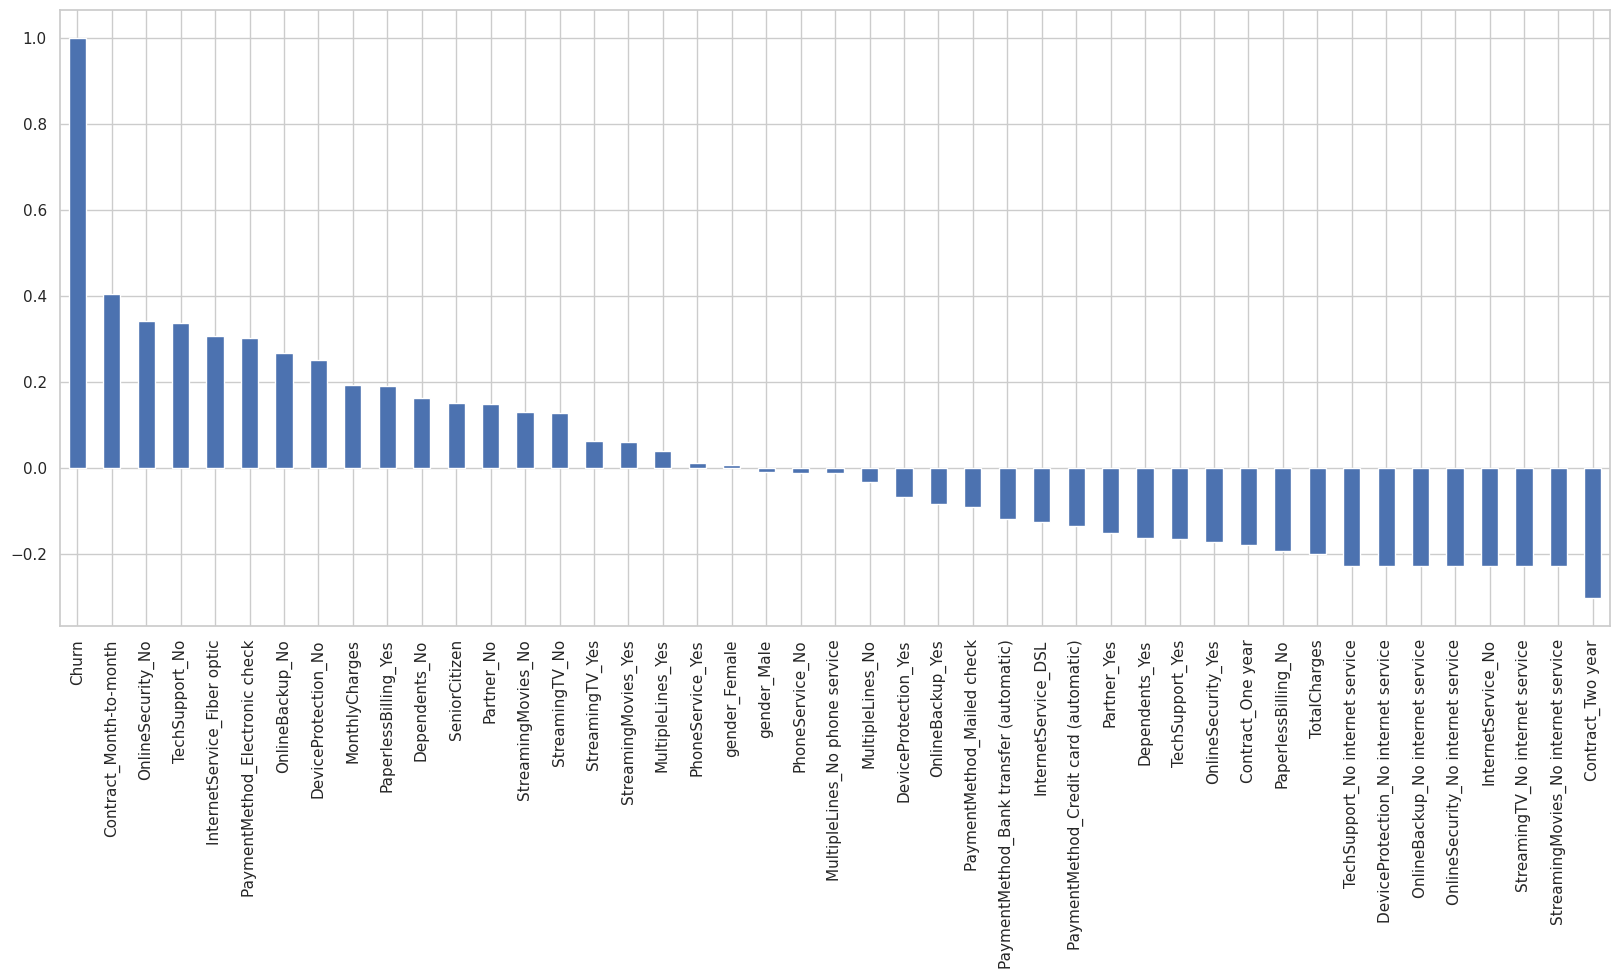

In [27]:

#correlation of all predictors with churn attitude
plt.figure(figsize=(20,8))
df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

Bivariate Analysis


In [28]:
df_target0=df.loc[df['Churn']==0]
df_target1=df.loc[df['Churn']==1]

In [31]:
def uniplot(df,col,title,hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.labelsize']=10
    plt.rcParams['axes.titlesize']=10
    plt.rcParams['axes.titlepad']=20
    temp = pd.Series(data=hue)
    fig,ax=plt.subplots()
    width=len(df[col].unique())+7+4*len(temp.unique())
    fig.set_size_inches(width,8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax=sns.countplot(data=df,x=col,order=df[col].value_counts().index,hue=hue,palette='bright')
    plt.show()

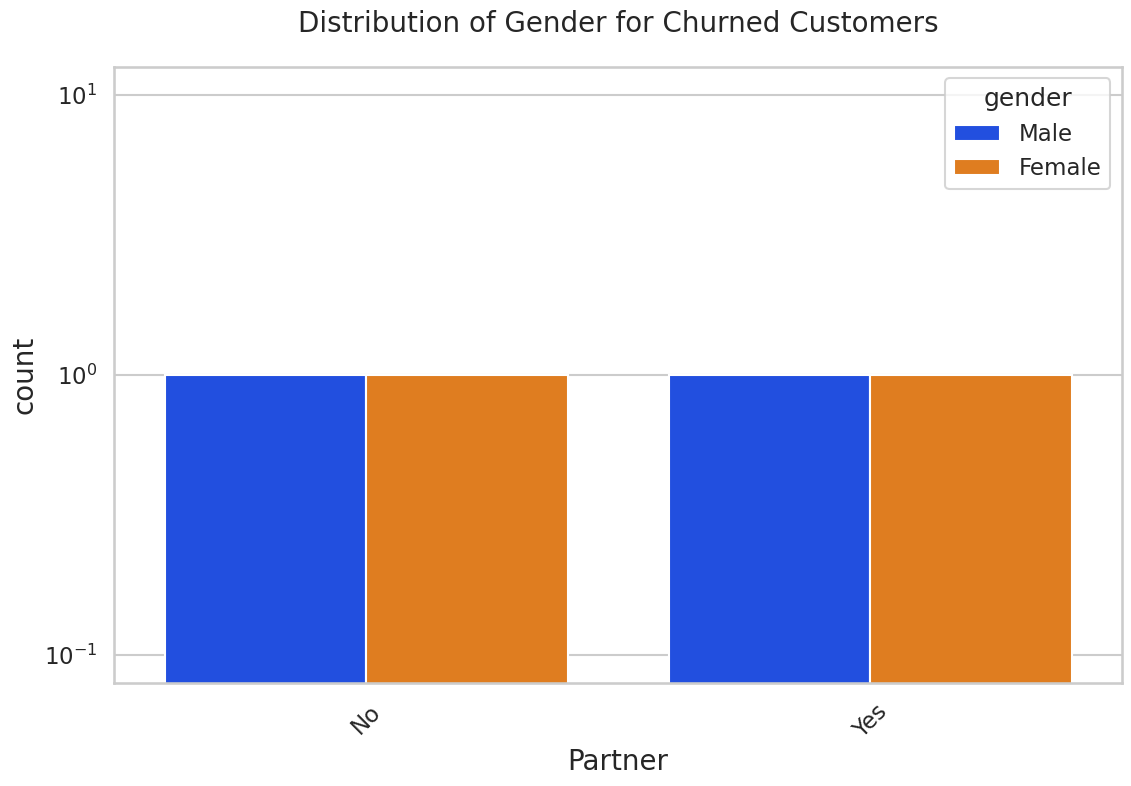

In [30]:
uniplot(df_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

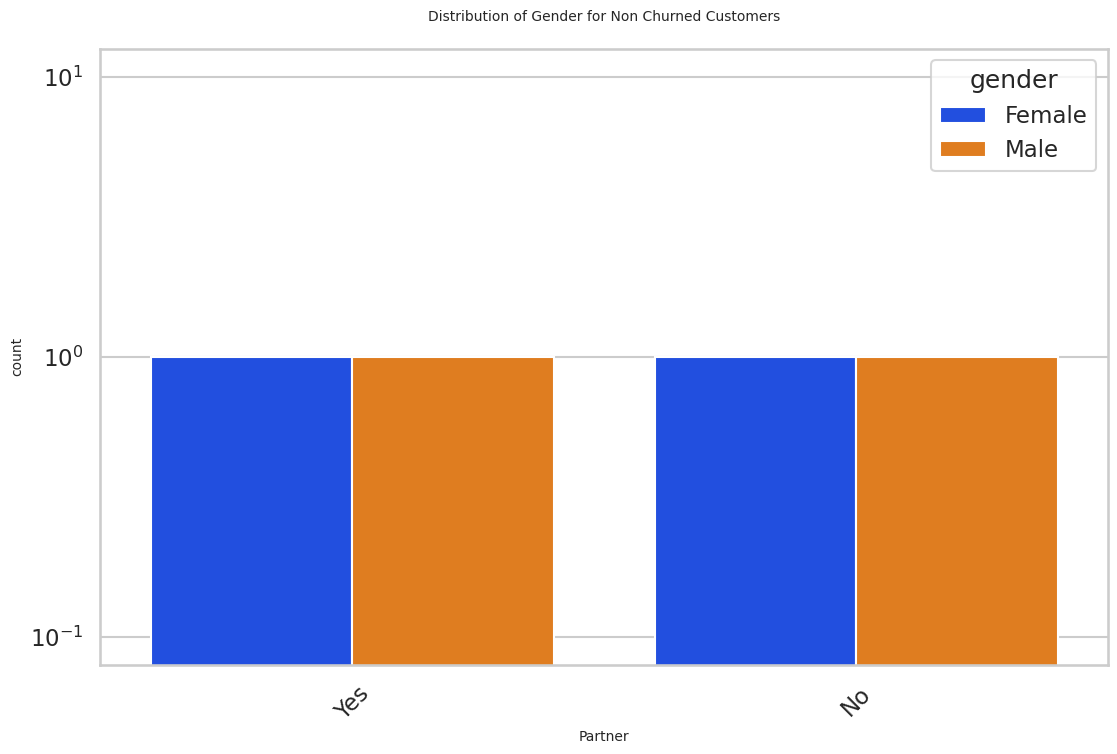

In [32]:
uniplot(df_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

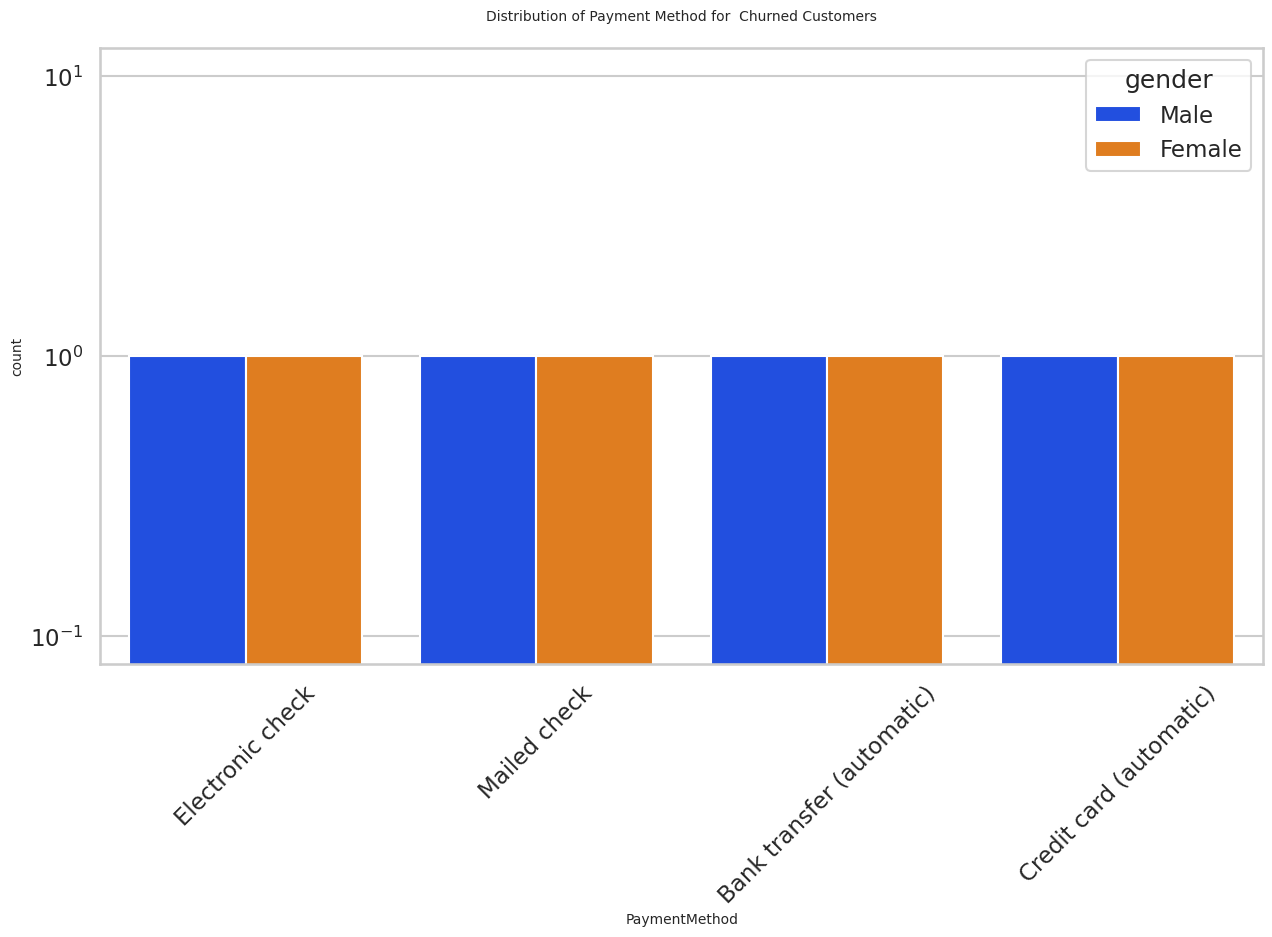

In [33]:
uniplot(df_target1,col='PaymentMethod',title='Distribution of Payment Method for  Churned Customers',hue='gender')


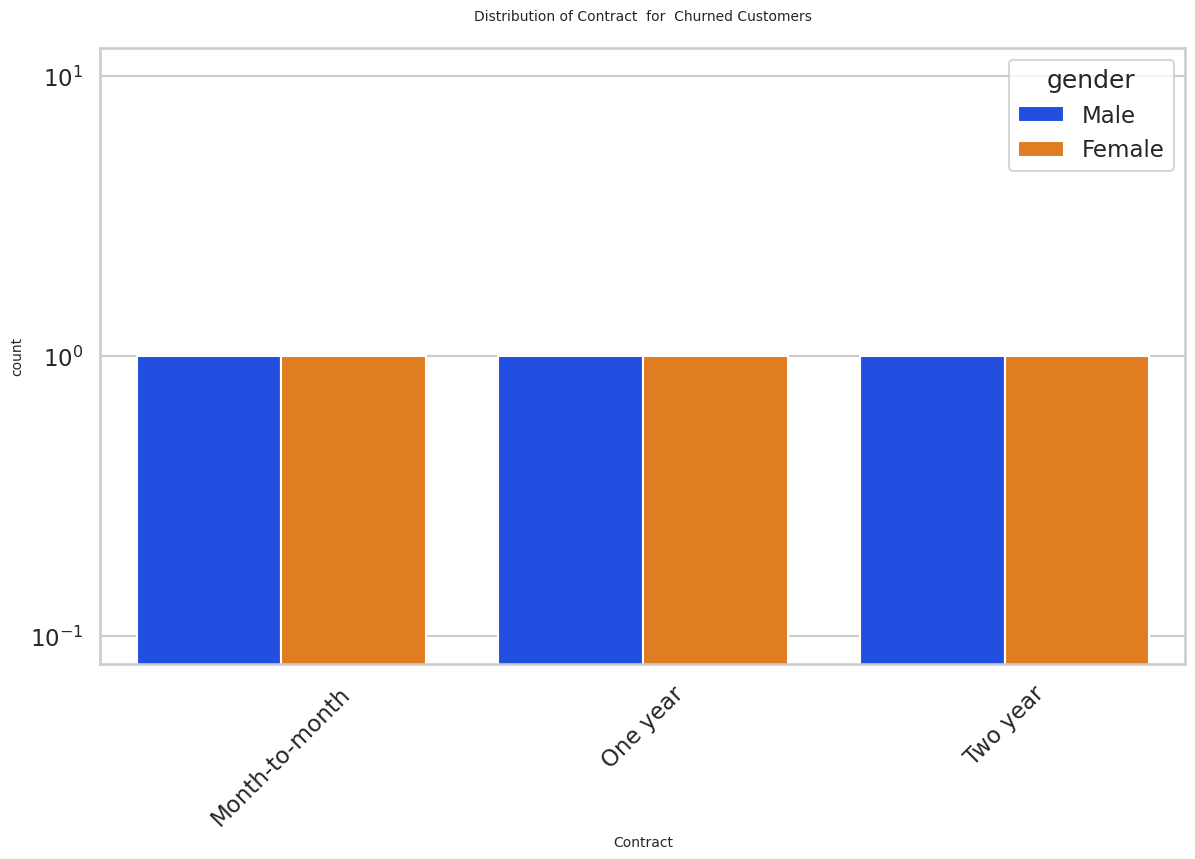

In [34]:
uniplot(df_target1,col='Contract',title='Distribution of Contract  for  Churned Customers',hue='gender')

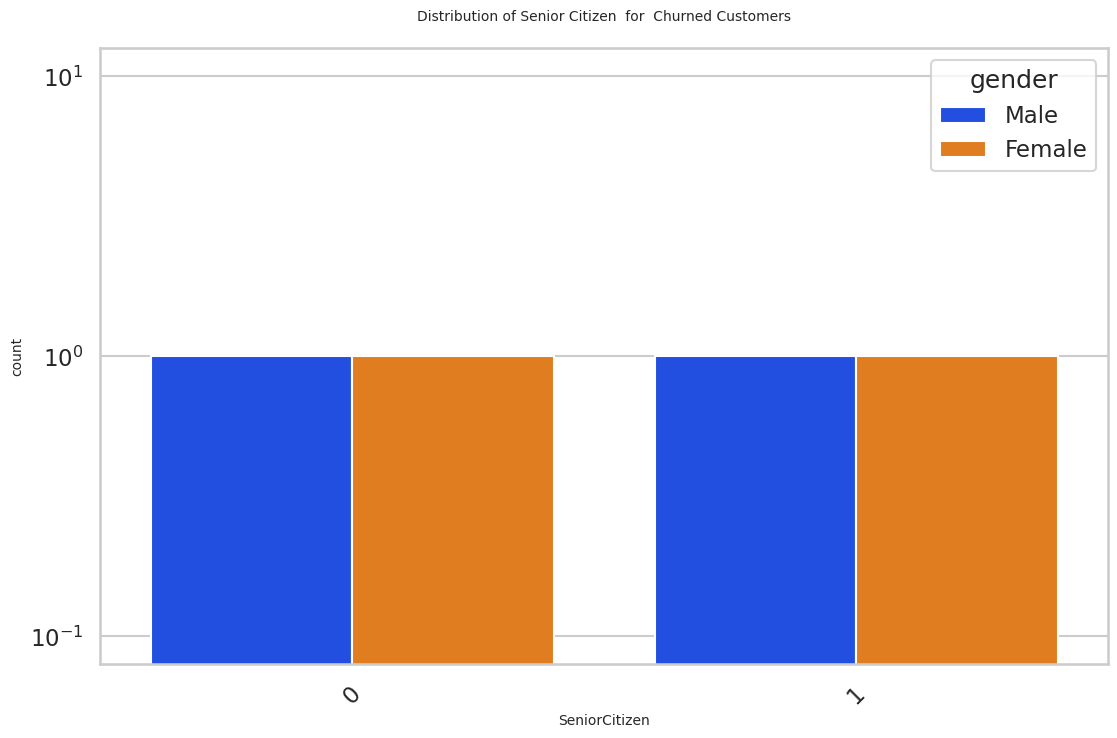

In [35]:
uniplot(df_target1,col='SeniorCitizen',title='Distribution of Senior Citizen  for  Churned Customers',hue='gender')

**3. Data Extracting**


In [36]:
#exporting the new dataframe
df_dummies.to_csv('Customer-newchurn-prediction.csv')

**4. Data Modeling**

In [77]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.combine import SMOTEENN

In [39]:
df=pd.read_csv('/content/Customer-newchurn-prediction.csv')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   int64  
 5   gender_Female                            7032 non-null   bool   
 6   gender_Male                              7032 non-null   bool   
 7   Partner_No                               7032 non-null   bool   
 8   Partner_Yes                              7032 non-null   bool   
 9   Dependents_No                            7032 non-null   bool   
 10  Dependents_Yes                           7032 no

In [42]:
df.shape

(7032, 46)

In [43]:
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,29.85,29.85,0,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,1,0,56.95,1889.50,0,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,2,0,53.85,108.15,1,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,3,0,42.30,1840.75,0,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,4,0,70.70,151.65,1,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False


In [44]:
df.tail()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
7027,7038,0,84.80,1990.50,0,False,True,False,True,False,...,True,False,True,False,False,True,False,False,False,True
7028,7039,0,103.20,7362.90,0,True,False,False,True,False,...,True,False,True,False,False,True,False,True,False,False
7029,7040,0,29.60,346.45,0,True,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False
7030,7041,1,74.40,306.60,1,False,True,False,True,True,...,False,True,False,False,False,True,False,False,False,True
7031,7042,0,105.65,6844.50,0,False,True,True,False,True,...,True,False,False,True,False,True,True,False,False,False


In [45]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [47]:
#Creating Features Vector
x=df.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,29.85,29.85,True,False,False,True,True,False,True,...,False,True,False,False,False,True,False,False,True,False
1,0,56.95,1889.50,False,True,True,False,True,False,False,...,False,False,True,False,True,False,False,False,False,True
2,0,53.85,108.15,False,True,True,False,True,False,False,...,False,True,False,False,False,True,False,False,False,True
3,0,42.30,1840.75,False,True,True,False,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,70.70,151.65,True,False,True,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,False,True,False,True,False,True,False,...,True,False,True,False,False,True,False,False,False,True
7028,0,103.20,7362.90,True,False,False,True,False,True,False,...,True,False,True,False,False,True,False,True,False,False
7029,0,29.60,346.45,True,False,False,True,False,True,True,...,False,True,False,False,False,True,False,False,True,False
7030,1,74.40,306.60,False,True,False,True,True,False,False,...,False,True,False,False,False,True,False,False,False,True


In [48]:
#Creating Trget Vector
y=df['Churn']
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7027,0
7028,0
7029,0
7030,1


**5. Training and Testing the Model**

Spliting data into training and test sets



In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
model_rfc=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [52]:
model_rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [53]:
y_pred=model_rfc.predict(x_test)

In [54]:
model_rfc.score(x_test,y_test)

0.7931769722814499

In [55]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1047
           1       0.64      0.45      0.53       360

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.78      0.79      0.78      1407



SMOTEENN

In [69]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [71]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)
model_rf_sm=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [72]:
model_rf_sm.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [73]:
yr_predict1 = model_rf_sm.predict(xr_test1)
yr_predict1

array([1, 0, 1, ..., 0, 1, 1])

In [74]:
model_score_r1 = model_rf_sm.score(xr_test1, yr_test1)
model_score_r1

0.9306260575296108

In [75]:
print(classification_report(yr_test1, yr_predict1))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       499
           1       0.93      0.96      0.94       683

    accuracy                           0.93      1182
   macro avg       0.93      0.93      0.93      1182
weighted avg       0.93      0.93      0.93      1182



**Decision Tree Classifier**

In [63]:
#Initiation of the Decision Tree Classifier model
model_dtc=DecisionTreeClassifier(
    criterion='gini',
    random_state=100,
    max_depth=6,
    min_samples_leaf=8
)

In [57]:
model_dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [58]:
y_pred_dtc=model_dtc.predict(x_test)
y_pred_dtc

array([0, 0, 0, ..., 0, 0, 1])

In [60]:
print(classification_report(y_test,y_pred_dtc,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1047
           1       0.65      0.52      0.58       360

    accuracy                           0.81      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.80      0.81      0.80      1407



SMOTEENN

In [61]:
sm=SMOTEENN()
X_resampled,y_resampled=sm.fit_resample(x,y)

In [62]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled,y_resampled,test_size=0.2)

In [65]:
#Initiation of the Decision Tree Classifier model
model_dtc_sm=DecisionTreeClassifier(
    criterion='gini',
    random_state=100,
    max_depth=6,
    min_samples_leaf=8
)

In [66]:
model_dtc_sm.fit(xr_train,yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [67]:
#Getting Predictions
y_pred_dtc_sm=model_dtc_sm.predict(xr_test)
y_pred_dtc_sm

array([1, 0, 1, ..., 1, 0, 1])

In [88]:
model_score_r2 = model_dtc_sm.score(xr_test1, yr_test1)
model_score_r2

0.9297800338409475

In [68]:
print(classification_report(yr_test,y_pred_dtc_sm,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       534
           1       0.95      0.94      0.94       659

    accuracy                           0.94      1193
   macro avg       0.94      0.94      0.94      1193
weighted avg       0.94      0.94      0.94      1193



Gradient Boosting

In [78]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x, y)


In [79]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [80]:
# Initialize and train Gradient Boosting model
model_gb = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    random_state=42
)
model_gb.fit(x_train, y_train)


GradientBoostingClassifier(max_depth=5, n_estimators=150, random_state=42,
                           subsample=0.8)

In [81]:

y_pred = model_gb.predict(x_test)


In [89]:
model_score_r3 = model_gb.score(xr_test1, yr_test1)
model_score_r3

0.9813874788494078

In [82]:
#Performance metrics
print("Gradient Boosting Classifier Evaluation")
print("Accuracy:",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Gradient Boosting Classifier Evaluation
Accuracy: 0.9578675838349097
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       540
           1       0.96      0.96      0.96       623

    accuracy                           0.96      1163
   macro avg       0.96      0.96      0.96      1163
weighted avg       0.96      0.96      0.96      1163



**6. Saving the Model**

In [83]:
import pickle

In [84]:
pickle.dump(model_rf_sm, open('churn_model.sav', 'wb'))

In [85]:
load_model = pickle.load(open('churn_model.sav', 'rb'))

In [86]:
model_score_r1 = load_model.score(xr_test1, yr_test1)

In [93]:
# Random Forest Accuracy
model_score_r1

0.9306260575296108

In [94]:
# Decision Tree Accuracy
model_score_r2

0.9297800338409475

In [95]:
# Gradient Boosting Accuracy
model_score_r3

0.9813874788494078